In [26]:
import os
import json

import numpy as np

In [27]:
# data_path = "./data/results/one-shot/5x5-relation"
data_path ="../../out"

In [28]:
data = []
for parent_folder in os.listdir(f"./{data_path}"):
    for child_folder in os.listdir(f"./{data_path}/{parent_folder}"):
        for file_name in os.listdir(f"./{data_path}/{parent_folder}/{child_folder}"):
            filepath = os.path.join(f"./{data_path}/{parent_folder}/{child_folder}", file_name)
            with open(filepath, "r") as file:
                json_data = json.load(file)
                data.append(json_data)

f1_scores_total = [d["metrics"]["overall_metrics"]["f1_score"] for d in data]
f1_scores_entity = [d["metrics"]["entity_metrics"]["overall"]["f1_score"] for d in data]
f1_scores_relation = [d["metrics"]["relation_metrics"]["overall"]["f1_score"] for d in data]

In [29]:
np.mean(f1_scores_total)

0.036888888888888895

In [30]:
np.mean(f1_scores_entity)

0.06804444444444445

In [31]:
np.mean(f1_scores_relation)

0.0008888888888888889

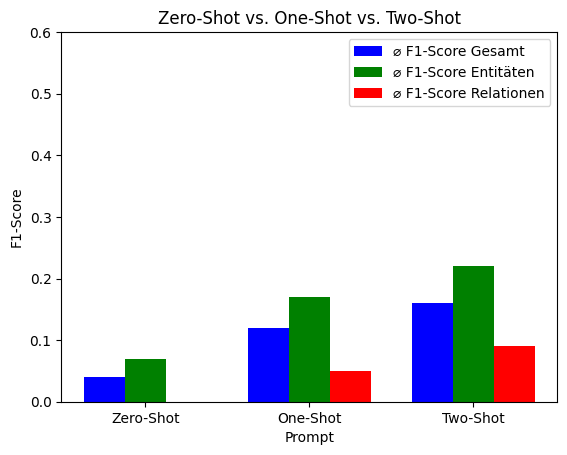

In [36]:
import numpy as np
import matplotlib.pyplot as plt

categories = ['Zero-Shot', 'One-Shot', 'Two-Shot']
values1 = [0.04, 0.12, 0.16]
values2 = [0.07, 0.17, 0.22]
values3 = [0.00, 0.05, 0.09]

bar_width = 0.25

r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, values1, color='b', width=bar_width, label='⌀ F1-Score Gesamt')
plt.bar(r2, values2, color='g', width=bar_width, label='⌀ F1-Score Entitäten')
plt.bar(r3, values3, color='r', width=bar_width, label='⌀ F1-Score Relationen')

plt.xlabel('Prompt')
plt.xticks([r + bar_width for r in range(len(categories))], categories)

plt.ylim((0, 0.6))

plt.ylabel('F1-Score')
plt.title('Zero-Shot vs. One-Shot vs. Two-Shot')

plt.legend()

plt.savefig("./images/vergleich_zero_shot_one_shot_two_shot.png", dpi=700)

plt.show()
